In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



pd.set_option("display.max_row",None)
pd.set_option("display.max_column",None)

In [2]:
import subprocess

try:
    subprocess.check_output('nvidia-smi')
    DEVICE = 'GPU'
except Exception:
    DEVICE = 'CPU'

print(f'Available device: {DEVICE}')

Available device: CPU


In [3]:
pip install kaggle

In [4]:
 mkdir ~/.kaggle

In [6]:
cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle competitions download -c  widsdatathon2024-challenge2

  0% 0.00/5.71M [00:00<?, ?B/s]
100% 5.71M/5.71M [00:00<00:00, 157MB/s]


In [9]:
!unzip widsdatathon2024-challenge2

Archive:  widsdatathon2024-challenge2.zip
  inflating: solution_template.csv   
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pds

# reading the XLSX file
file = ('train.csv')

newData = pds.read_csv(file)

# displaying the contents of the XLSX file
newData.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,27.52,16.55,41.83,28.31,9.21,4.11,13.32,38.78,53.60,5.85,11.82,5.31,92.95,1.73,0.33,0.20,0.03,0.83,3.94,3.03,22.24,19.27,0.42,25.35,8.06,8.11,38.55,39.88,42.75,55.16,65.17,75.98,76.75,76.45,73.67,59.73,45.18,37.43,31.67,33.83,42.35,57.72,67.35,75.92,74.28,79.59,70.84,62.39,41.89,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,29.37,10.93,35.26,35.33,12.46,6.04,18.49,36.35,52.51,7.45,9.19,5.21,88.75,6.44,0.

In [11]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13173 entries, 0 to 13172
Columns: 152 entries, patient_id to metastatic_diagnosis_period
dtypes: float64(137), int64(4), object(11)
memory usage: 15.3+ MB


In [12]:
newData.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
count,13173.000000,13173.000000,13173.000000,4102.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13173.000000,13168.000000,13173.000000,1.316800e+04,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13140.000000,13170.000000,13173.000000,13173.000000,13170.000000,13153.000000,13173.000000,13156.000000,13146.000000,13114.000000,13170.000000,13170.000000,13169.000000,13164.000000,13144.000000,12993.000000,13173.000000,13021.000000,13173.000000,13173.000000,13173.000000,13173.000000,13149.000000,13173.000000,13167.000000,13161.000000,13161.00000,13145.000000,13173.000000,13173.000000,13173.000000,13151.000000,13173.000000,13157.000000,13157.000000,13155.000000,13157.000000,13157.000000,13173.000000,13173.000000,13154.000000,13173.000000,13157.000000,13173.000000,13173.000000,13173.000000,13170.000000,13160.000000,13164.000000,13173.000000,13173.000000,13173.000000,13173.000000,13172.000000,13142.000000,13173.000000,13163.0

In [13]:
result = newData.dtypes
print(result)

patient_id                                 int64
patient_race                              object
payer_type                                object
patient_state                             object
patient_zip3                               int64
Region                                    object
Division                                  object
patient_age                                int64
patient_gender                            object
bmi                                      float64
breast_cancer_diagnosis_code              object
breast_cancer_diagnosis_desc              object
metastatic_cancer_diagnosis_code          object
metastatic_first_novel_treatment          object
metastatic_first_novel_treatment_type     object
population                               float64
density                                  float64
age_median                               float64
age_under_10                             float64
age_10_to_19                             float64
age_20s             

In [14]:
newData["patient_state"].nunique()

44

In [15]:
newData["patient_state"].unique()

array(['AR', 'IL', 'CA', 'IN', 'OH', 'DE', 'LA', 'PA', 'MN', 'MI', 'NY',
       'FL', 'CO', 'KY', 'GA', 'TX', 'VA', 'NC', 'HI', 'NM', 'NV', 'MD',
       'TN', 'MO', 'SC', 'AZ', 'UT', 'WA', 'NE', 'OR', 'IA', 'ID', 'WI',
       'OK', 'AL', 'MT', 'SD', 'KS', 'AK', 'WY', 'MS', 'DC', 'WV', 'ND'],
      dtype=object)

In [16]:
newData["patient_zip3"].nunique()

751

In [17]:
newData["patient_zip3"].unique()

array([724, 629, 925, 900, 934, 461, 448, 198, 706, 922, 191, 453, 553,
       481, 104, 485, 347, 809, 421, 300, 564, 484, 400, 770, 305, 241,
       112, 329, 282, 441, 968, 303, 467, 109, 492, 957, 926, 870, 124,
       483, 890, 431, 273, 920, 341, 620, 218, 113, 460, 601, 766, 475,
       927, 902, 782, 331, 802, 611, 245, 100, 613, 625, 907, 125, 398,
       402, 482, 608, 488, 110, 374, 906, 114, 800, 471, 427, 773, 339,
       912, 761, 936, 640, 477, 785, 120, 606, 463, 600, 442, 750, 412,
       297, 787, 652, 757, 238, 610, 775, 456, 764, 857, 852, 316, 778,
       618, 928, 551, 913, 322, 847, 494, 464, 230, 121, 622, 760, 190,
       189, 604, 931, 705, 336, 405, 450, 315, 452, 981, 335, 334, 281,
       122, 717, 330, 960, 944, 786, 685, 648, 240, 983, 958, 476, 974,
       751, 231, 840, 280, 952, 528, 837, 701, 301, 895, 875, 284, 939,
       910, 752, 950, 514, 224, 765, 152, 490, 919, 836, 554, 546, 850,
       951, 462, 776, 894, 914, 605, 306, 801, 372, 469, 480, 95

In [18]:
newData["Region"].nunique()


4

In [19]:
newData["Region"].unique()

array(['South', 'Midwest', 'West', 'Northeast'], dtype=object)

In [20]:
newData["Division"].nunique()


8

In [21]:
newData["Division"].unique()

array(['West South Central', 'East North Central', 'Pacific',
       'South Atlantic', 'Middle Atlantic', 'West North Central',
       'Mountain', 'East South Central'], dtype=object)

In [22]:
newData.groupby(["Region","Division"]).size().reset_index(name="count")

,Region,Division,count
0,Midwest,East North Central,3010
1,Midwest,West North Central,756
2,Northeast,Middle Atlantic,1721
3,South,East South Central,494
4,South,South Atlantic,1968
5,South,West South Central,1498
6,West,Mountain,1029
7,West,Pacific,2697


In [23]:
newData.groupby(["patient_state","Division"]).size().reset_index(name="count")

,patient_state,Division,count
0,AK,Pacific,7
1,AL,East South Central,30
2,AR,West South Central,81
3,AZ,Mountain,243
4,CA,Mountain,1
5,CA,Pacific,2376
6,CO,Mountain,364
7,DC,South Atlantic,15
8,DE,South Atlantic,19
9,FL,South Atlantic,587


In [24]:
i = newData[((newData.patient_state == "CA") & (newData.Division == "Mountain"))].index


In [25]:
newData = newData.drop(i)

In [26]:
newData.groupby(["patient_state","Division"]).size().reset_index(name="count")

,patient_state,Division,count
0,AK,Pacific,7
1,AL,East South Central,30
2,AR,West South Central,81
3,AZ,Mountain,243
4,CA,Pacific,2376
5,CO,Mountain,364
6,DC,South Atlantic,15
7,DE,South Atlantic,19
8,FL,South Atlantic,587
9,GA,South Atlantic,562


In [27]:
newData.groupby(["patient_zip3","patient_state"]).size().reset_index(name="count")

,patient_zip3,patient_state,count
0,100,NY,109
1,101,NY,2
2,103,NY,41
3,104,NY,118
4,105,NY,36
5,106,NY,4
6,107,NY,11
7,108,NY,5
8,109,NY,22
9,110,NY,16


In [28]:
i = newData[((newData.patient_state == "IL") & (newData.patient_zip3 == 630))].index
print(i)

Index([2221], dtype='int64')


In [29]:
newData = newData.drop(i)

In [30]:
newData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13171 entries, 0 to 13172
Columns: 152 entries, patient_id to metastatic_diagnosis_period
dtypes: float64(137), int64(4), object(11)
memory usage: 15.4+ MB


In [31]:
newData.groupby(["patient_zip3","patient_state"]).size().reset_index(name="count")

,patient_zip3,patient_state,count
0,100,NY,109
1,101,NY,2
2,103,NY,41
3,104,NY,118
4,105,NY,36
5,106,NY,4
6,107,NY,11
7,108,NY,5
8,109,NY,22
9,110,NY,16


In [32]:
newData["patient_race"].nunique()

5

In [46]:
newData["patient_race"].unique()

array([nan, 'White', 'Hispanic', 'Black', 'Other', 'Asian'], dtype=object)

In [47]:
newData["payer_type"].nunique()

3

In [48]:
newData["payer_type"].unique()

array(['COMMERCIAL', nan, 'MEDICAID', 'MEDICARE ADVANTAGE'], dtype=object)

In [45]:
newData.isnull().sum().sort_values()

patient_id                                   0
Average of Apr-13                            0
Average of Mar-13                            0
veteran                                      0
health_uninsured                             0
commute_time                                 0
disabled                                     0
hispanic                                     0
race_multiple                                0
race_other                                   0
race_pacific                                 0
race_native                                  0
race_asian                                   0
race_black                                   0
race_white                                   0
unemployment_rate                            0
labor_force_participation                    0
education_stem_degree                        0
education_college_or_above                   0
education_graduate                           0
education_bachelors                          0
education_som

In [52]:
newData["payer_type"].value_counts()

payer_type
COMMERCIAL            6297
MEDICAID              2591
MEDICARE ADVANTAGE    2518
Name: count, dtype: int64

In [53]:
newData["payer_type"] = newData["payer_type"].fillna(newData["payer_type"].mode()[0])

In [54]:
newData["payer_type"].value_counts()

payer_type
COMMERCIAL            8062
MEDICAID              2591
MEDICARE ADVANTAGE    2518
Name: count, dtype: int64

In [ ]:
newData["payer_type"].value_counts()

In [55]:
newData["patient_race"].value_counts()

patient_race
White       3564
Black       1159
Hispanic     807
Other        612
Asian        372
Name: count, dtype: int64

In [56]:
newData["patient_race"] = newData["patient_race"].fillna(newData["patient_race"].mode()[0])

In [57]:
newData["patient_race"].value_counts()

patient_race
White       10221
Black        1159
Hispanic      807
Other         612
Asian         372
Name: count, dtype: int64

In [60]:
newData.drop(["patient_race","bmi","metastatic_first_novel_treatment","metastatic_first_novel_treatment_type"],axis = 1 , inplace = True)

In [62]:
nullcol = newData.columns[newData.isna().sum() > 0].tolist()
nullcol

['family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'home_ownership',
 'home_value',
 'rent_median',
 'rent_burden',
 'self_employed',
 'farmer',
 'poverty',
 'limited_english',
 'Average of Jan-13',
 'Average of Feb-13',
 'Average of May-13',
 'Average of Jun-13',
 'Average of Aug-13',
 'Average of Sep-13',
 'Average of Oct-13',
 'Average of Nov-13',
 'Average of Dec-13',
 'Average of Jan-14',
 'Average of Feb-14',
 'Average of Mar-14',
 'Average of Apr-14',
 'Average of Jun-14',
 'Average of Nov-14',
 'Average of Jan-15',
 'Average of Feb-15',
 'Average of Mar-15',
 'Average of Apr-15',
 'Average of Aug-15',
 'A

In [64]:
for i in nullcol:
  newData[i].fillna((newData[i].mean),inplace = True)

In [65]:
newData.isnull().sum()

patient_id                          0
payer_type                          0
patient_state                       0
patient_zip3                        0
Region                              0
Division                            0
patient_age                         0
patient_gender                      0
breast_cancer_diagnosis_code        0
breast_cancer_diagnosis_desc        0
metastatic_cancer_diagnosis_code    0
population                          0
density                             0
age_median                          0
age_under_10                        0
age_10_to_19                        0
age_20s                             0
age_30s                             0
age_40s                             0
age_50s                             0
age_60s                             0
age_70s                             0
age_over_80                         0
male                                0
female                              0
married                             0
divorced    

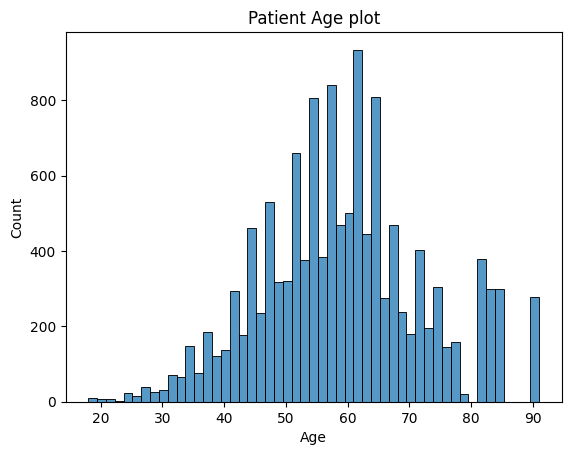

In [93]:
sns.histplot(newData["patient_age"])
plt.title("Patient Age plot")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

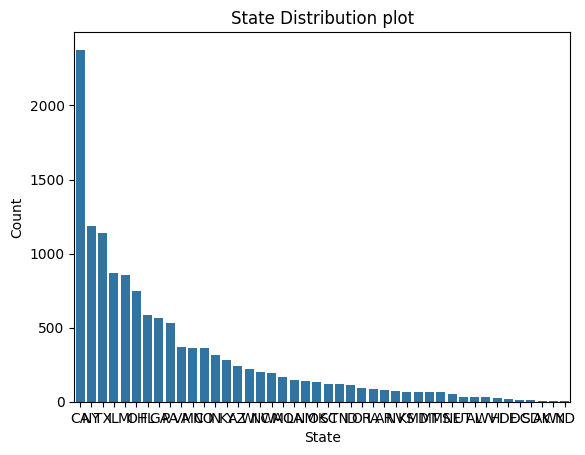

In [92]:
sns.barplot(newData["patient_state"].value_counts())
plt.title("State Distribution plot")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

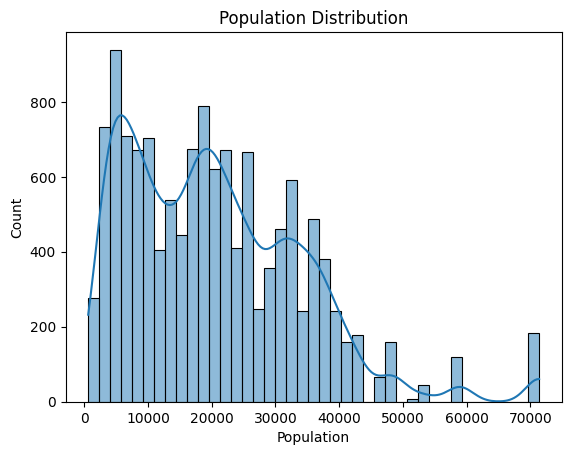

In [97]:
sns.histplot(newData["population"],kde = True)
plt.title("Population Distribution")
plt.xlabel("Population")
plt.ylabel("Count")
plt.show()